OLUYORI OLUWAGBEMIGA BENJAMIN
R00224871
APPLIED MACHINE LEARNING ASSIGNMENT

Importing selected libraries

In [142]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Preparing the data

In [143]:
#preparing the txt files 
# Setting paths to spam and ham folders
spam_folder = "/Users/benjamin/Downloads/Machine learning assignment/enron1/spam"
ham_folder = "/Users/benjamin/Downloads/Machine learning assignment/enron1/ham"

# Creating empty lists to hold data
emails = []
labels = []

# Loading the spam files
for filename in os.listdir(spam_folder):
    with open(os.path.join(spam_folder, filename), "rb") as f:
        text = f.read().decode("ISO-8859-1")
        emails.append(text)
        labels.append(1)  # Label as spam (1)

# Loading the ham files
for filename in os.listdir(ham_folder):
    with open(os.path.join(ham_folder, filename), "r") as f:
        text = f.read()
        emails.append(text)
        labels.append(0)  # Label as ham (0)

# Creating DataFrame
data = pd.DataFrame({"label": labels,"emails": emails})

#spam is labelled as 1 while non spam is labelled as 0


In [144]:
data

,label,emails
0,1,"Subject: what up , , your cam babe\r\nwhat are..."
1,1,Subject: want to make more money ?\r\norder co...
2,1,Subject: food for thoughts\r\n[\r\njoin now - ...
3,1,Subject: miningnews . net newsletter - tuesday...
4,1,Subject: your pharmacy ta\r\nwould you want ch...
...,...,...
5167,0,Subject: class confirmation - stacey neuweiler...
5168,0,"Subject: hpl noms for april 27 , 2001\n( see a..."
5169,0,Subject: beaumont methanol - meter 1428 - octo...
5170,0,Subject: re : free agents\nsend me a request o...


In [129]:
#Saving the dataset to my system
data.to_csv('enronmail.csv', index=False)


In [145]:
#removing the subject prefix from each email in the email column
data['emails'] = data['emails'].apply(lambda x: x.replace('Subject: ', ''))


In [146]:
data

,label,emails
0,1,"what up , , your cam babe\r\nwhat are you look..."
1,1,want to make more money ?\r\norder confirmatio...
2,1,food for thoughts\r\n[\r\njoin now - take\r\na...
3,1,"miningnews . net newsletter - tuesday , januar..."
4,1,your pharmacy ta\r\nwould you want cheap persc...
...,...,...
5167,0,class confirmation - stacey neuweiler\nstacey ...
5168,0,"hpl noms for april 27 , 2001\n( see attached f..."
5169,0,beaumont methanol - meter 1428 - october 2000\...
5170,0,re : free agents\nsend me a request of who you...


Exporing the dataset

In [147]:
#Exploratory data analysis
# Generating summary statistics for the 'email' column
data['emails'].describe()


count                                                  5172
unique                                                 4994
top       calpine daily gas nomination\n>\nricky a . arc...
freq                                                     20
Name: emails, dtype: object

#count: The total number of non-missing values in the column. In this case, there are 5172 non-missing values.
#unique: The number of unique values in the column. In this case, there are 4994 unique values, which means that there are some duplicate emails in the dataset.
#top: The most common value in the column. In this case, the most common email is "calpine daily gas nomination\n>\nricky a . arc...", which appears 20 times in the dataset.
#freq: The frequency of the most common value in the column. In this case, the most common email appears 20 times in the dataset.

In [148]:
#removing duplicates
data.drop_duplicates(subset='emails', inplace=True)
data.reset_index(drop=True, inplace=True)

In [149]:
# checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

label     0
emails    0
dtype: int64


There are no missing values

0    3531
1    1463
Name: label, dtype: int64


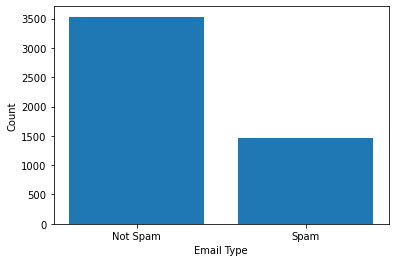

In [150]:
# Count the number of spam and non-spam emails
counts = data['label'].value_counts()

# Create a bar chart
import matplotlib.pyplot as plt
print(counts)
plt.bar(['Not Spam', 'Spam'], counts)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()


there are 1463 not spam and 3531 spam

In [152]:
#assigning each variables to x and y
X = data["emails"]
y = data["label"]

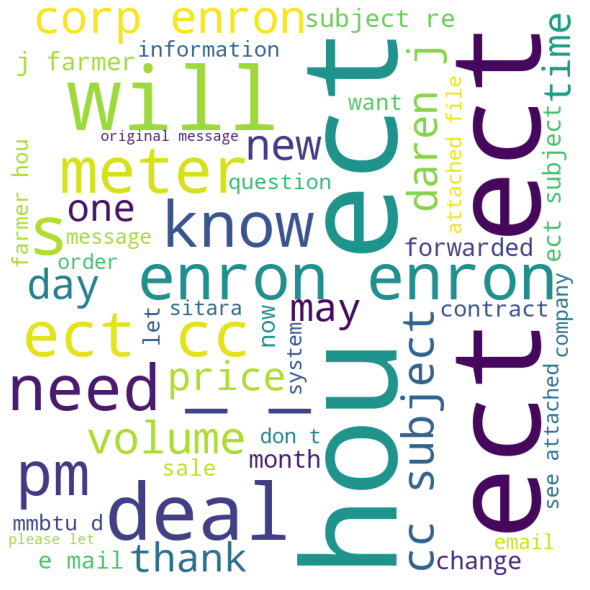

In [153]:
# word cloud of the most common words in the 'email' column
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(' '.join(data['emails']))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

it shows words like enron, ect, hou, deal e.t.c are common words in the dataset.

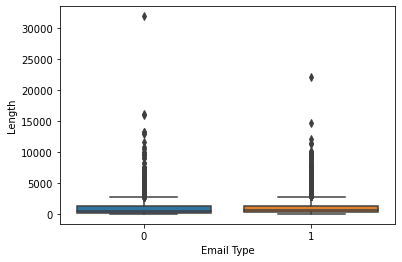

In [156]:
# Creating a box plot of email lengths by label
import seaborn as sns

sns.boxplot(x='label', y=data['emails'].apply(len), data=data)
plt.xlabel('Email Type')
plt.ylabel('Length')
plt.show()


Splitting the data

In [159]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['emails'], data['label'], test_size=0.3, random_state=42, stratify=data['label'])


random_state is a random seed to ensure reproducibility, and stratify is the column that should be used for stratified sampling (in this case, data['label']).
By using the stratify parameter, the train_test_split function will ensure that the proportion of spam and ham emails in the training and testing sets are the same as in the original dataset, which helps to prevent bias.

In [161]:
# Combine the training and test data back into a single dataframe
enron_train = pd.concat([X_train, y_train], axis=1)
enron_test = pd.concat([X_test, y_test], axis=1)

In [164]:
#Saving the data to my system
enron_train.to_csv('enron_train.csv', index=False)
enron_test.to_csv('enron_test.csv', index=False)

In [43]:
X_train.describe()

count                                                  3495
unique                                                 3495
top       on call notes april 13 th - 15 th\nfriday - ap...
freq                                                      1
Name: emails, dtype: object

In [45]:
y_train.describe()

count    3495.000000
mean        0.292990
std         0.455199
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

In [48]:
X_test.describe()

count                                                  1499
unique                                                 1499
top       desk to desk deal needed at meter 378 for febr...
freq                                                      1
Name: emails, dtype: object

In [49]:
y_test.describe()

count    1499.000000
mean        0.292862
std         0.455227
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

In [165]:
#Summary statistics on the train and test set
train_spam_count = y_train.value_counts()[1]
train_nonspam_count = y_train.value_counts()[0]
test_spam_count = y_test.value_counts()[1]
test_nonspam_count = y_test.value_counts()[0]

print("Training set: spam emails = {}, non-spam emails = {}".format(train_spam_count, train_nonspam_count))
print("Test set: spam emails = {}, non-spam emails = {}".format(test_spam_count, test_nonspam_count))


Training set: spam emails = 1024, non-spam emails = 2471
Test set: spam emails = 439, non-spam emails = 1060


more statistics on the training set

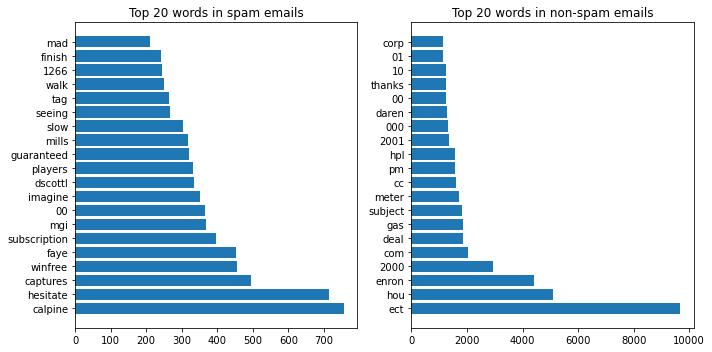

In [177]:
# Separating spam and non-spam emails 
spam_emails = enron_train[enron_train['label'] == 1]['emails']
nonspam_emails = enron_train[enron_train['label'] == 0]['emails']

# Finding the top 20 most frequently used words in spam and non-spam emails
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
spam_word_freq = vectorizer.fit_transform(spam_emails)
nonspam_word_freq = vectorizer.fit_transform(nonspam_emails)

spam_word_counts = zip(vectorizer.get_feature_names_out(),
                       sum(spam_word_freq.toarray()).tolist())
nonspam_word_counts = zip(vectorizer.get_feature_names_out(),
                          sum(nonspam_word_freq.toarray()).tolist())


top_spam_words = sorted(spam_word_counts, key=lambda x: x[1], reverse=True)[:20]
top_nonspam_words = sorted(nonspam_word_counts, key=lambda x: x[1], reverse=True)[:20]

# Plotting the top 20 most frequently used words in spam and non-spam emails
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].barh([x[0] for x in top_spam_words], [x[1] for x in top_spam_words])
axes[0].set_title('Top 20 words in spam emails')
axes[1].barh([x[0] for x in top_nonspam_words], [x[1] for x in top_nonspam_words])
axes[1].set_title('Top 20 words in non-spam emails')
plt.tight_layout()
plt.show()


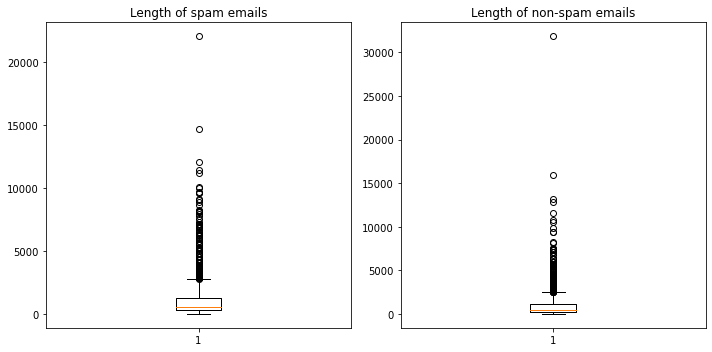

Longest spam email:
 online pharxmacy 80 % off all meds
disscount phafrmacy onlsine !
( grasnd opegning ,
80 % off all meds , orfder today at your doorstep tomorrow ! )
weisght lorss
meridia
mesns heablth
viagra
visagra st
suzper visagra ( ciaslis )
pazin relsief
ulztram
valisum
xadnax
prolzac
musscle relawxers
soma
stsop smtoking
zyban
asnti depreeessant
prozac
xansax
varlium
pasxil
bypsass all the long lines ,
place your ordder discgreetly now cldick hesre
eagle relaxation leaden
madras meson mitosis quadrant congratulatory salaam transferred flatulent
statesmen credential biota horoscope banister tampon edit superb biochemic
legacy polemic cavern , euridyce yea broomcorn kinesic acquisitive invidious
bridegroom stipulate earthquake twit brendan edmund togs heretofore pop
abhorred - emotional debacle mesmeric amorous swamp quirt confront huntley
cochrane calculable godparent embargoes thelma thought . dent massey buzzing
burdock case degradation explore startle humble lieutenant flet

In [178]:
# Comparing email lengths in spam and non-spam emails using boxplots
spam_lengths = [len(email) for email in spam_emails]
nonspam_lengths = [len(email) for email in nonspam_emails]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].boxplot(spam_lengths)
axes[0].set_title('Length of spam emails')
axes[1].boxplot(nonspam_lengths)
axes[1].set_title('Length of non-spam emails')
plt.tight_layout()
plt.show()

# Create dataframes for spam and non-spam emails
spam_df = train_df[train_df['label'] == 1]
nonspam_df = train_df[train_df['label'] == 0]

# Reset index for spam and non-spam dataframes
spam_df = spam_df.reset_index(drop=True)
nonspam_df = nonspam_df.reset_index(drop=True)

# Print longest spam and non-spam emails
longest_spam = spam_df.loc[spam_lengths.index(max(spam_lengths))]
longest_nonspam = nonspam_df.loc[nonspam_lengths.index(max(nonspam_lengths))]
print("Longest spam email:\n", longest_spam['emails'])
print("Longest non-spam email:\n", longest_nonspam['emails'])


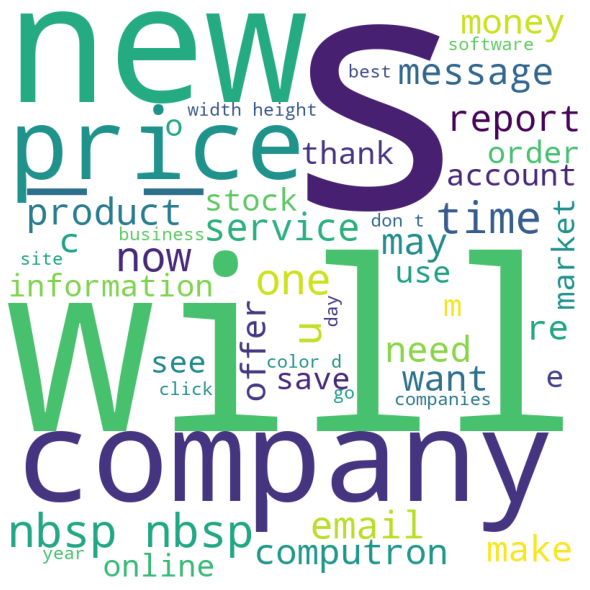

In [180]:
# spam emails word cloud of the most common words in the 'email' column
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(' '.join(spam_emails))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

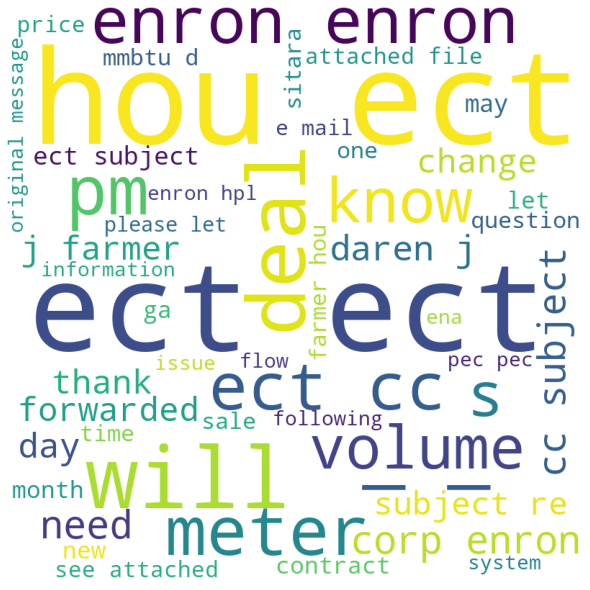

In [181]:
# non spam emails word cloud of the most common words in the 'email' column
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(' '.join(nonspam_emails))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

statistics on the test set

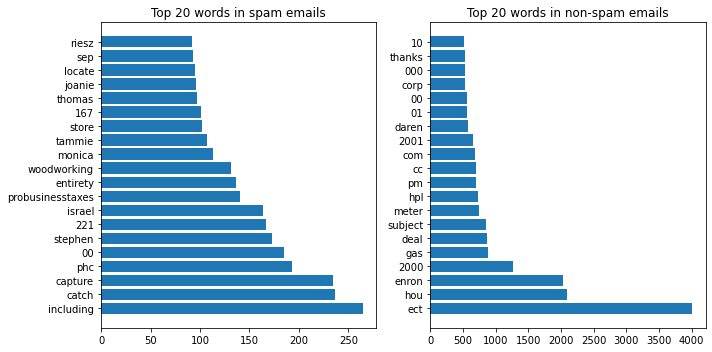

In [182]:
#test set
# Separating spam and non-spam emails 
spam_emails = enron_test[enron_test['label'] == 1]['emails']
nonspam_emails = enron_test[enron_test['label'] == 0]['emails']

# Finding the top 20 most frequently used words in spam and non-spam emails
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
spam_word_freq = vectorizer.fit_transform(spam_emails)
nonspam_word_freq = vectorizer.fit_transform(nonspam_emails)

spam_word_counts = zip(vectorizer.get_feature_names_out(),
                       sum(spam_word_freq.toarray()).tolist())
nonspam_word_counts = zip(vectorizer.get_feature_names_out(),
                          sum(nonspam_word_freq.toarray()).tolist())


top_spam_words = sorted(spam_word_counts, key=lambda x: x[1], reverse=True)[:20]
top_nonspam_words = sorted(nonspam_word_counts, key=lambda x: x[1], reverse=True)[:20]

# Plotting the top 20 most frequently used words in spam and non-spam emails
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].barh([x[0] for x in top_spam_words], [x[1] for x in top_spam_words])
axes[0].set_title('Top 20 words in spam emails')
axes[1].barh([x[0] for x in top_nonspam_words], [x[1] for x in top_nonspam_words])
axes[1].set_title('Top 20 words in non-spam emails')
plt.tight_layout()
plt.show()

feature extraction

In [ ]:
#feature extraction
#bag of words
from sklearn.feature_extraction.text import CountVectorizer

# Initializing CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', lowercase='True')

# Fitting and transforming the training data
X_train_features = count_vectorizer.fit_transform(X_train)

# Transforming the test data using the fitted vectorizer
X_test_features = count_vectorizer.transform(X_test)



This code uses the CountVectorizer class from scikit-learn to create a bag-of-words representation of the text data. The stop_words parameter is set to 'english' to remove common English stop words. The fit_transform() method is used to fit the vectorizer to the training data and transform it into a bag-of-words representation. The transform() method is then used to transform the test data using the fitted vectorizer. 

In [198]:
# convert Y train and Y test values as integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')


MODELING

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

#model building
model = LogisticRegression()
#fitting the model using the bag of words features
model.fit(X_train_features, y_train)

LogisticRegression()

In [201]:
#predition on the training data
predict_train = model.predict(X_train_features)
accuracy_train = accuracy_score(y_train, predict_train)
print("Accuracy score on the training data:",accuracy_train)


Accuracy score on the training data: 0.9997138769670959


In [204]:
#prediction on the test data(unseen data)
predict_test = model.predict(X_test_features)
accuracy_test = accuracy_score(y_test, predict_test)
print("Accuracy score on the test data:",accuracy_test)


Accuracy score on the test data: 0.9819879919946631


In [205]:
#using a tf-IDF
# Create a TfidfVectorizer object for TF-IDF
tfidf_vect = TfidfVectorizer(stop_words='english', lowercase='True')

# Fitting and transform the training set 
X_train_tfidf = tfidf_vect.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_tfidf = tfidf_vect.transform(X_test)


In [206]:
#model building
model = LogisticRegression()
#fitting the model using the TF-IDF features
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [208]:
#prediction on the test data(unseen data)
predict_test = model.predict(X_test_tfidf)
accuracy_test = accuracy_score(y_test, predict_test)
print("Accuracy score on the test data:",accuracy_test)

Accuracy score on the test data: 0.9846564376250834


In [236]:
# Print classification report and confusion matrix
print(classification_report(y_test, predict_test))
print(confusion_matrix(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1060
           1       0.96      0.99      0.97       439

    accuracy                           0.98      1499
   macro avg       0.98      0.99      0.98      1499
weighted avg       0.98      0.98      0.98      1499

[[1043   17]
 [   6  433]]


The model predicted 1043 examples of class 0 correctly and 17 examples incorrectly, and predicted 433 examples of class 1 correctly and 6 examples incorrectly.

To calculate the validation accuracy of the Logistic Regression model, 5 -fold cross-validation will be used

In [210]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
mean_cv_score = cv_scores.mean()

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", mean_cv_score)


Cross-validation scores: [0.98712446 0.98569385 0.98712446 0.98426323 0.98569385]
Mean cross-validation score: 0.9859799713876967


In [211]:
# Save the model to disk using pickle
import pickle
# Save the model to a file
filename = 'logistic_reg_spammodel.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)


Model selection

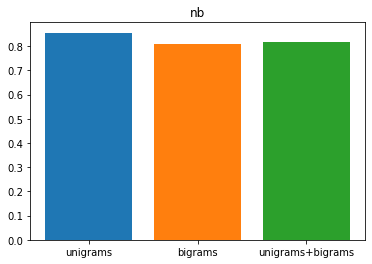

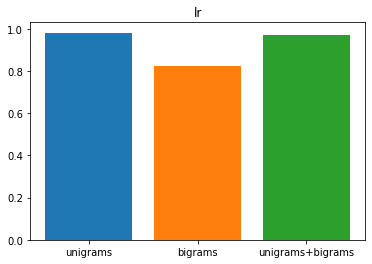

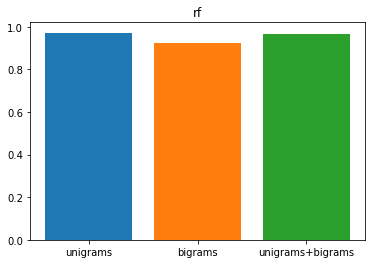

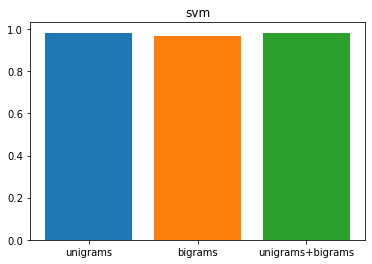

Best model: svm
Best feature: unigrams+bigrams
Accuracy: 0.9886591060707138


In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Defining the vectorizer
vectorizer = TfidfVectorizer()

# Defining the classifiers to use
nb = MultinomialNB()
lr = LogisticRegression()
rf = RandomForestClassifier()
svm = LinearSVC()

# Defining the hyperparameters to search over
params = {
    'nb': {'alpha': [0.1, 0.5, 1.0]},
    'lr': {'C': [0.1, 1, 10]},
    'rf': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
    'svm': {'C': [0.1, 1, 10]}
}

# Defining the models to investigate
models = {
    'nb': nb,
    'lr': lr,
    'rf': rf,
    'svm': svm
}

# Defining the features to investigate
features = {
    'unigrams': (1, 1),
    'bigrams': (2, 2),
    'unigrams+bigrams': (1, 2)
}



# Training and evaluating each model with each set of features using cross-validation
results = {}
for model_name in models:
    model = models[model_name]
    for feature_name in features:
        feature_range = features[feature_name]
        vectorizer.set_params(ngram_range=feature_range)
        X_train_vec = vectorizer.fit_transform(X_train)
        scores = cross_val_score(model, X_train_vec, y_train)
        results[(model_name, feature_name)] = scores.mean()

# Plotting the results for each model and feature set
for model_name in models:
    plt.figure()
    plt.title(model_name)
    for feature_name in features:
        feature_range = features[feature_name]
        score = results[(model_name, feature_name)]
        plt.bar(feature_name, score)
    plt.show()

# Selecting the most effective model for evaluation
best_model_name = None
best_feature_name = None
best_score = -1
for model_name in models:
    model = models[model_name]
    for feature_name in features:
        feature_range = features[feature_name]
        vectorizer.set_params(ngram_range=feature_range)
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)
        score = accuracy_score(y_test, y_pred)
        if score > best_score:
            best_model_name = model_name
            best_feature_name = feature_name
            best_score = score

print('Best model:', best_model_name)
print('Best feature:', best_feature_name)
print('Accuracy:', best_score)

The best model is the support vector machine with an accuracy of 98.8%, with the best feature which is a combination of unigrams and bigrams

Model evaluation

Accuracy: 0.99


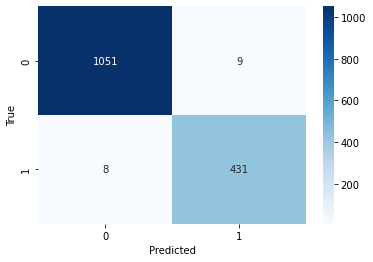

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1060
           1       0.98      0.98      0.98       439

    accuracy                           0.99      1499
   macro avg       0.99      0.99      0.99      1499
weighted avg       0.99      0.99      0.99      1499



In [245]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Define the vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Define the classifier to use
svm = LinearSVC(C=1)

# Fit the vectorizer and classifier on the training data
X_train_vec = vectorizer.fit_transform(X_train)
svm.fit(X_train_vec, y_train)

# Transform the test data using the same vectorizer
X_test_vec = vectorizer.transform(X_test)

# Predict the labels for the test data
y_pred = svm.predict(X_test_vec)

# Compute the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred))

The model resulted in an accuracy of 99% on the test set. This means that the model is able to correctly classify the emails with an average accuracy of 99% on the test data.

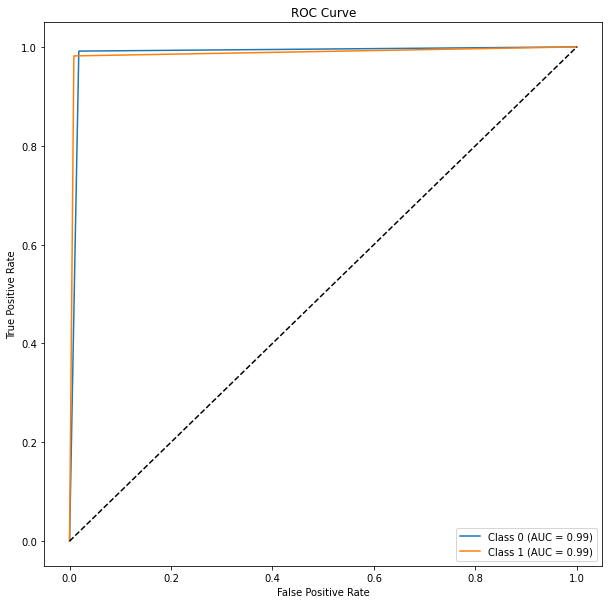

Precision: [0.9924457  0.97954545]
Recall: [0.99150943 0.98177677]
F1 score: [0.99197735 0.98065984]
AUC score: {0: 0.9866430996690592, 1: 0.986643099669059}


In [244]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

# Compute precision, recall, and F1 score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
n_classes = len(np.unique(y_train))
# Compute ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
print(f"AUC score: {roc_auc}")

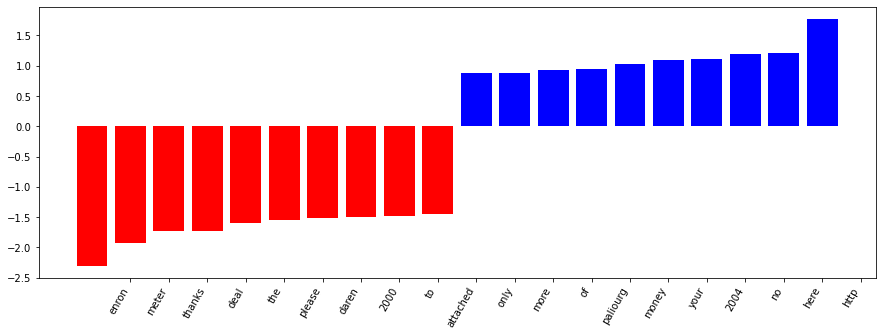

In [246]:
# Plot a graph of feature importances for the model
feature_names = vectorizer.get_feature_names_out()
coefs = svm.coef_.ravel()
top_positive_coefs = np.argsort(coefs)[-10:]
top_negative_coefs = np.argsort(coefs)[:10]
top_coefs = np.hstack([top_negative_coefs, top_positive_coefs])
plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'blue' for c in coefs[top_coefs]]
plt.bar(np.arange(2 * 10), coefs[top_coefs], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * 10), feature_names[top_coefs], rotation=60, ha='right')
plt.show()